## **Simple linear regression**

Import useful libraries

In [1]:
from src.utils import VIF, compute_F_statistic, regression_metrics
from src.visualization import regression_diagnostic_plot

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

### **3. Preparing the Data**

In [3]:
%store -r df

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Identify predictors and response variable**

In [5]:
predictors_list = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

In [6]:
X = df[predictors_list].values
y = df[['mpg']].values

**Split data in training set and test set**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
X_train.shape, X_test.shape

((333, 7), (59, 7))

**Data standardisation**

In [9]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

### **4. Training the Model**

Linear regression model fit on data

In [10]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

### **5. Evaluating the Model**

**Partial dependence plot**

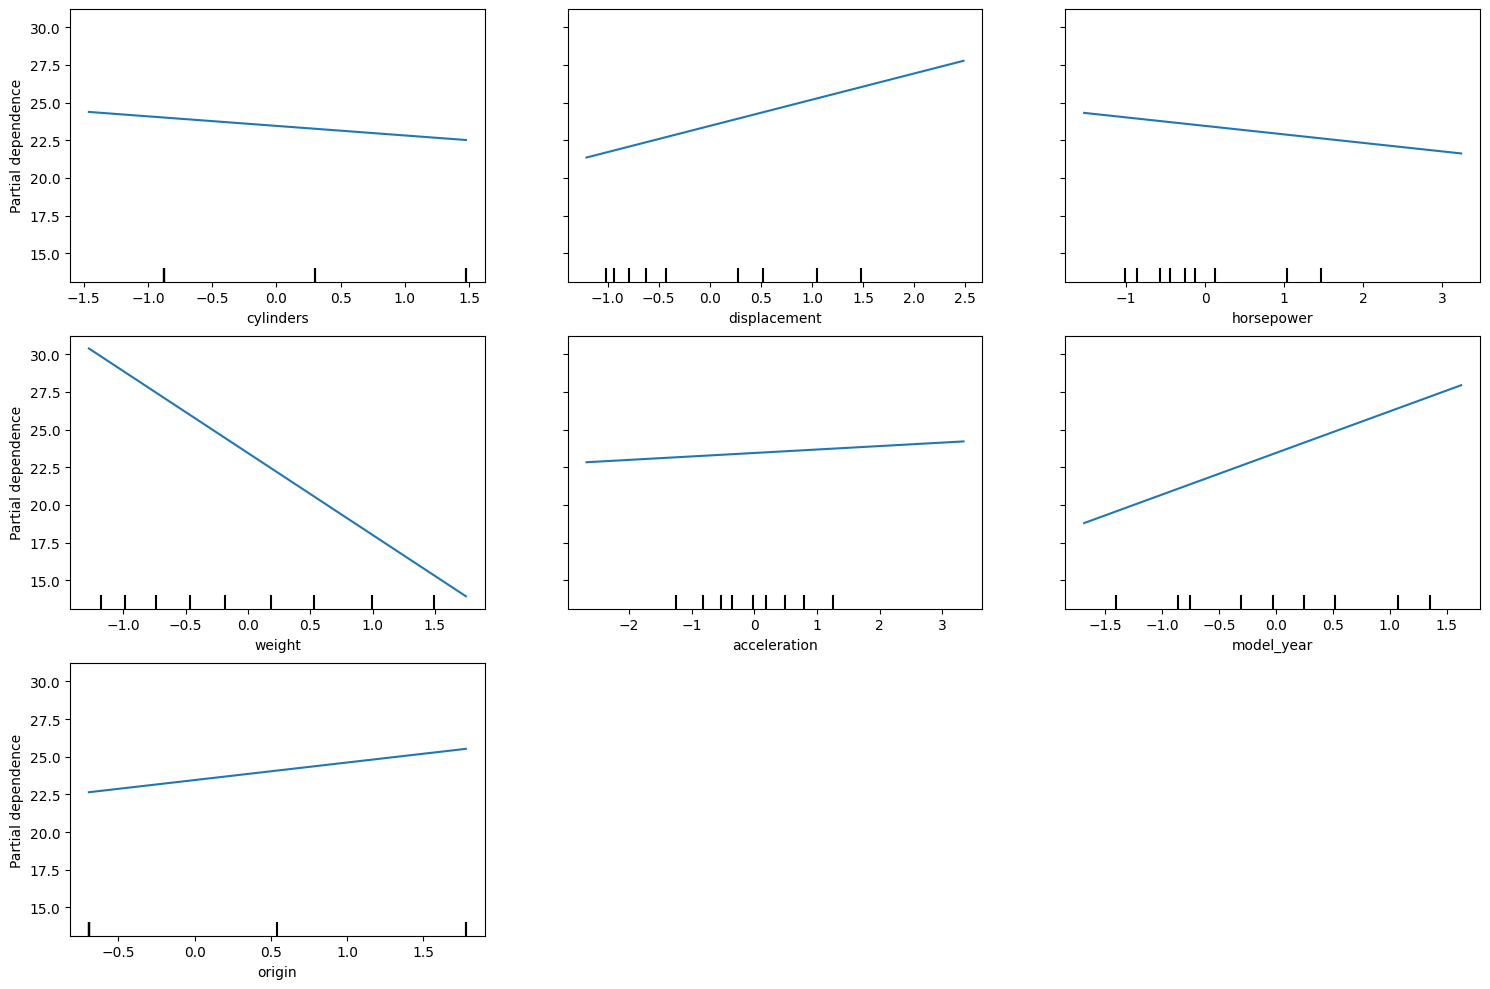

In [11]:
plt.rcParams['figure.figsize'] = (15, 10)
PartialDependenceDisplay.from_estimator(estimator=lr, X=X_train_std, features=list(range(0, len(predictors_list))), feature_names=predictors_list)
plt.tight_layout()
plt.show()

**Residual analysis**

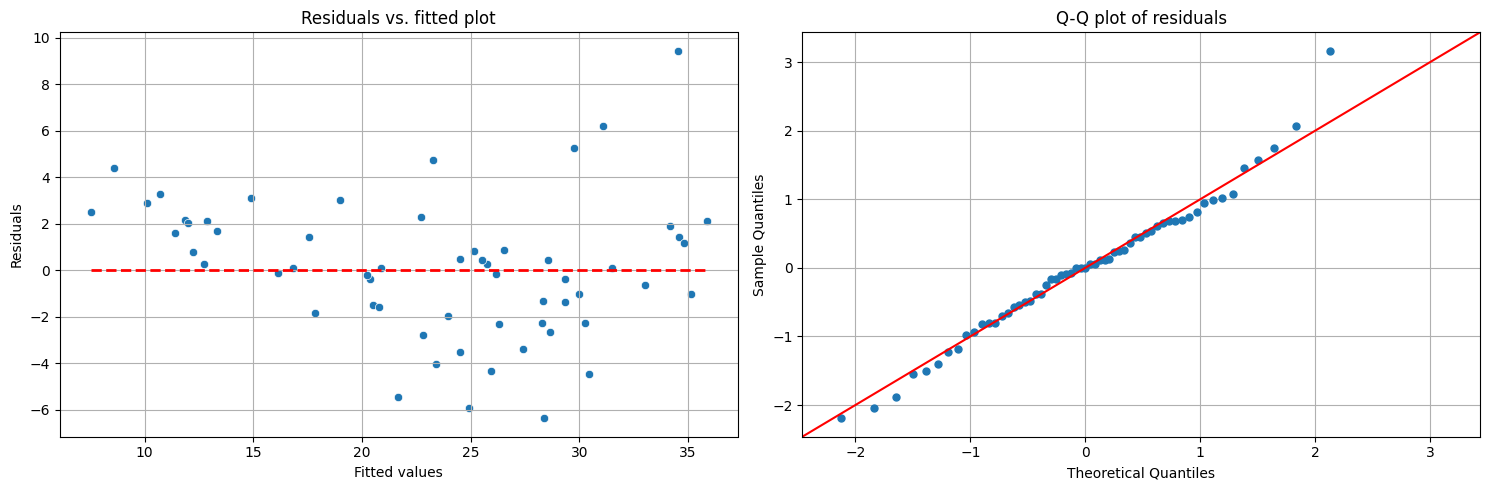

In [12]:
regression_diagnostic_plot(y_pred=y_pred, y_true=y_test)

**Variance Inflation Factor (VIF)**

In [13]:
VIF(X=X_train_std, columns=predictors_list)

Variance Inflation Factor for cylinders: 10.58
Variance Inflation Factor for displacement: 21.6
Variance Inflation Factor for horsepower: 10.27
Variance Inflation Factor for weight: 10.39
Variance Inflation Factor for acceleration: 2.71
Variance Inflation Factor for model_year: 1.28
Variance Inflation Factor for origin: 1.76


**Computation of F-score and p-value**

In [14]:
compute_F_statistic(X=X_train_std, y=y_train, model=lr)

F-statistic: 206.13
p-value:  0.00


**Computation of regression metrics**

In [15]:
regression_metrics(y_true=y_test, y_pred=y_pred)

Mean absolute error: 2.25
Median absolute error: 1.91
Mean squared error: 8.71
Root mean squared error: 2.95
R2 score: 0.85
